<a href="https://colab.research.google.com/github/serfsup/thinkful-final-capstone/blob/master/final_capstone_00_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd 'drive/My Drive/Colab Datasets'

/content/drive/My Drive/Colab Datasets


In [0]:
ls

amazon_reviews_UK.tsv  holdout_clean.tsv   X_eval_text_sparse.npz
amazon_reviews_US.tsv  text_col_names.csv  X_holdout_text_sparse.npz
eval_clean.tsv         train_clean.tsv     X_train_text_sparse.npz


In [0]:
!pip install -q imgaug==0.2.6
!pip install -q matplotlib==3.1.0  # 3.1.1 issues with seaborn heatmap.

     |████████████████████████████████| 634kB 2.8MB/s 
     |████████████████████████████████| 13.1MB 2.6MB/s 


In [0]:
# Import data science environment.
import os
import pickle
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set_style('white')

In [0]:
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('seaborn', sns.__version__)

pandas 0.25.3
numpy 1.17.4
seaborn 0.9.0


In [0]:
UK_df = pd.read_csv('./amazon_reviews_UK.tsv', sep='\t', error_bad_lines=False,
                    parse_dates=['review_date'])

b'Skipping line 101882: expected 15 fields, saw 22\nSkipping line 115512: expected 15 fields, saw 22\n'
b'Skipping line 328404: expected 15 fields, saw 22\n'
b'Skipping line 1412642: expected 15 fields, saw 22\n'


In [0]:
US_df = pd.read_csv('./amazon_reviews_US.tsv', sep='\t', error_bad_lines=False,
                    parse_dates=['review_date'])

b'Skipping line 3231472: expected 15 fields, saw 22\n'
b'Skipping line 3509762: expected 15 fields, saw 22\n'
b'Skipping line 4018793: expected 15 fields, saw 22\n'
b'Skipping line 4280173: expected 15 fields, saw 22\nSkipping line 4290596: expected 15 fields, saw 22\n'
b'Skipping line 4331421: expected 15 fields, saw 22\nSkipping line 4340267: expected 15 fields, saw 22\nSkipping line 4341665: expected 15 fields, saw 22\nSkipping line 4386155: expected 15 fields, saw 22\nSkipping line 4388098: expected 15 fields, saw 22\n'
b'Skipping line 4408027: expected 15 fields, saw 22\nSkipping line 4442615: expected 15 fields, saw 22\n'
b'Skipping line 4519623: expected 15 fields, saw 22\n'
b'Skipping line 4525797: expected 15 fields, saw 22\nSkipping line 4543519: expected 15 fields, saw 22\n'
b'Skipping line 4587726: expected 15 fields, saw 22\nSkipping line 4589301: expected 15 fields, saw 22\nSkipping line 4634393: expected 15 fields, saw 22\n'
b'Skipping line 4666168: expected 15 fields, s

In [0]:
UK_df.shape

(1705837, 15)

In [0]:
US_df.shape

(6900886, 15)

In [0]:
# Count lines in df.
cat amazon_reviews_UK.tsv | wc -l

1707495


In [0]:
cat amazon_reviews_US.tsv | wc -l

6931167


In [0]:
UK_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,UK,10349,R2YVNBBMXD8KVJ,B00MWK7BWG,307651059,My Favourite Faded Fantasy,Music,5,0,0,N,Y,Five Stars,The best album ever!,2014-12-29
1,UK,10629,R2K4BOL8MN1TTY,B006CHML4I,835010224,Seiko 5 Men's Automatic Watch with Black Dial ...,Watches,4,0,0,N,Y,Great watch from casio.,What a great watch. Both watches and strap is ...,2013-10-24
2,UK,12136,R3P40IEALROVCH,B00IIFCJX0,271687675,Dexter Season 8,Digital_Video_Download,5,0,0,N,Y,fantastic,"love watching all the episodes of Dexter, when...",2014-05-09
3,UK,12268,R25XL1WWYRDLA9,B000W7JWUA,211383699,The Settlers of Catan Board Game - discontinue...,Toys,5,0,0,N,Y,Five Stars,Excellent game!!!,2014-09-19
4,UK,12677,RVTVB9YDXSFYH,B005JTAP4S,182965893,Peter: A Darkened Fairytale (Vol 1),Digital_Ebook_Purchase,5,12,12,N,N,A twist on Tales,"This cute, quick read is very different to say...",2013-09-18


In [0]:
assert US_df.shape[1] == UK_df.shape[1]
assert UK_df.columns.all() == US_df.columns.all()
combined_df = pd.concat([UK_df.copy(), US_df.copy()])
assert combined_df.shape[0] == US_df.shape[0] + UK_df.shape[0]

In [0]:
combined_df.reset_index(inplace=True)
combined_df.head()

,index,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,UK,10349,R2YVNBBMXD8KVJ,B00MWK7BWG,307651059,My Favourite Faded Fantasy,Music,5.000,0.000,0.000,N,Y,Five Stars,The best album ever!,2014-12-29
1,1,UK,10629,R2K4BOL8MN1TTY,B006CHML4I,835010224,Seiko 5 Men's Automatic Watch with Black Dial ...,Watches,4.000,0.000,0.000,N,Y,Great watch from casio.,What a great watch. Both watches and strap is ...,2013-10-24
2,2,UK,12136,R3P40IEALROVCH,B00IIFCJX0,271687675,Dexter Season 8,Digital_Video_Download,5.000,0.000,0.000,N,Y,fantastic,"love watching all the episodes of Dexter, when...",2014-05-09
3,3,UK,12268,R25XL1WWYRDLA9,B000W7JWUA,211383699,The Settlers of Catan Board Game - discontinue...,Toys,5.000,0.000,0.000,N,Y,Five Stars,Excellent game!!!,2014-09-19
4,4,UK,12677,RVTVB9YDXSFYH,B005JTAP4S,182965893,Peter: A Darkened Fairytale (Vol 1),Digital_Ebook_Purchase,5.000,12.000,12.000,N,N,A twist on Tales,"This cute, quick read is very different to say...",2013-09-18


In [0]:
combined_df.isnull().sum()

index                  0
marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating            1
helpful_votes          1
total_votes            1
vine                   1
verified_purchase      1
review_headline       81
review_body           91
review_date          375
dtype: int64

In [0]:
combined_df = combined_df.drop_duplicates()

In [0]:
# Drop rows with null values.
combined_df = combined_df.dropna()

In [0]:
combined_df.isnull().sum()

index                0
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [0]:
combined_df.dtypes

index                         int64
marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                 float64
helpful_votes               float64
total_votes                 float64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
dtype: object

In [0]:
# Change dtypes from float64 to int64.
combined_df.star_rating = combined_df.star_rating.astype(int)
combined_df.helpful_votes = combined_df.helpful_votes.astype(int)
combined_df.total_votes = combined_df.total_votes.astype(int)

In [0]:
combined_df.dtypes

index                         int64
marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                   int64
helpful_votes                 int64
total_votes                   int64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
dtype: object

In [0]:
combined_df.review_body.head()

0                                 The best album ever!
1    What a great watch. Both watches and strap is ...
2    love watching all the episodes of Dexter, when...
3                                    Excellent game!!!
4    This cute, quick read is very different to say...
Name: review_body, dtype: object

In [0]:
cols_to_drop = ['customer_id', 'review_id', 'product_id', 'product_parent',
                'product_title', 'review_headline', 'review_date']
                
combined_df = combined_df.drop(cols_to_drop, axis=1)

In [0]:
combined_df['helpful_rate'] = np.where(
  combined_df['total_votes'] > 0,
  combined_df['helpful_votes'] / combined_df['total_votes'], -1)

In [0]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8606178 entries, 0 to 8606722
Data columns (total 10 columns):
index                int64
marketplace          object
product_category     object
star_rating          int64
helpful_votes        int64
total_votes          int64
vine                 object
verified_purchase    object
review_body          object
helpful_rate         float64
dtypes: float64(1), int64(4), object(5)
memory usage: 722.3+ MB


In [0]:
# Change objects to category types where appropriate.
combined_df['marketplace'] = combined_df.marketplace.astype('category')
combined_df['vine'] = combined_df.vine.astype('category')
combined_df['verified_purchase'] = combined_df.verified_purchase.astype(
    'category')
combined_df['product_category'] = combined_df.product_category.astype(
    'category')

In [0]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8606178 entries, 0 to 8606722
Data columns (total 10 columns):
index                int64
marketplace          category
product_category     category
star_rating          int64
helpful_votes        int64
total_votes          int64
vine                 category
verified_purchase    category
review_body          object
helpful_rate         float64
dtypes: category(4), float64(1), int64(4), object(1)
memory usage: 492.5+ MB


In [0]:
# Split into train and eval/holdout groups.
X = combined_df.drop('star_rating', axis=1)
y = combined_df.star_rating
X_train, X_eval_holdout, y_train, y_eval_holdout = train_test_split(
    X, y, test_size=0.3, random_state=15)

In [0]:
# Split into eval and holdout groups.
X_eval, X_holdout, y_eval, y_holdout = train_test_split(
    X_eval_holdout, y_eval_holdout, test_size=0.5, random_state=15)

In [0]:
X_train.nunique()

index                5189193
marketplace                2
product_category          38
helpful_votes           1391
total_votes             1516
vine                       2
verified_purchase          2
review_body          5550793
helpful_rate           11221
dtype: int64

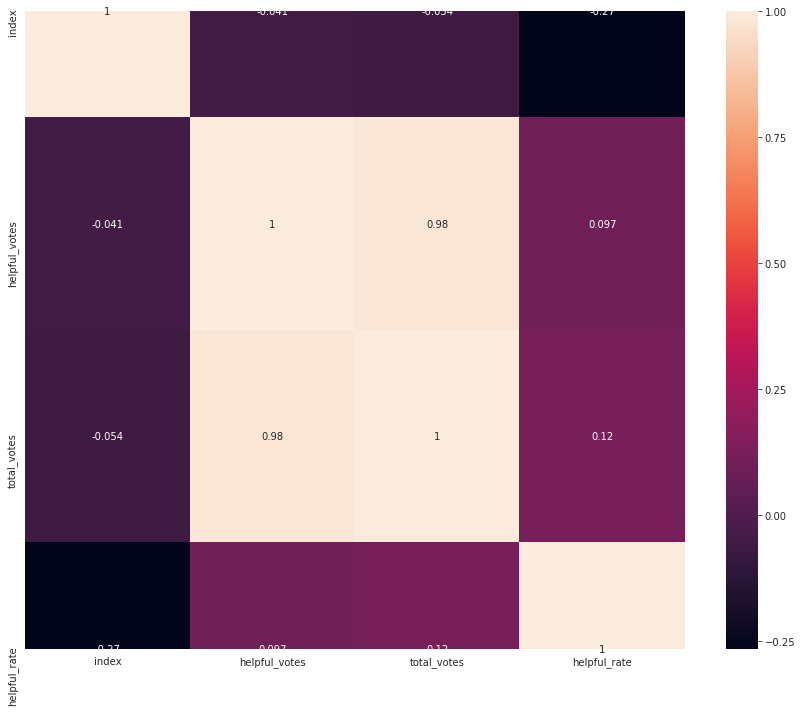

In [0]:
# Run heatmap to check for variable correlations.
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 10})
plt.tight_layout();

It appears that total_votes and helpful_votes are highly correlated for both data sets. Therefore, we should drop one of them. Not sure which one to drop at this point, but will need to discuss it and decide.

In [0]:
X_train.vine.value_counts()

N    6016198
Y       8126
Name: vine, dtype: int64

In [0]:
y_train.value_counts().sort_index(ascending=False)

5    3897011
4    1086854
3     462365
2     235714
1     342380
Name: star_rating, dtype: int64

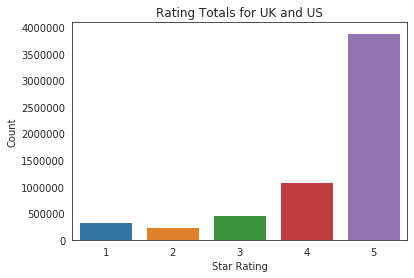

In [0]:
sns.countplot(y_train).set_title(
    "Rating Totals for UK and US")
plt.xlabel('Star Rating')
plt.ylabel('Count');

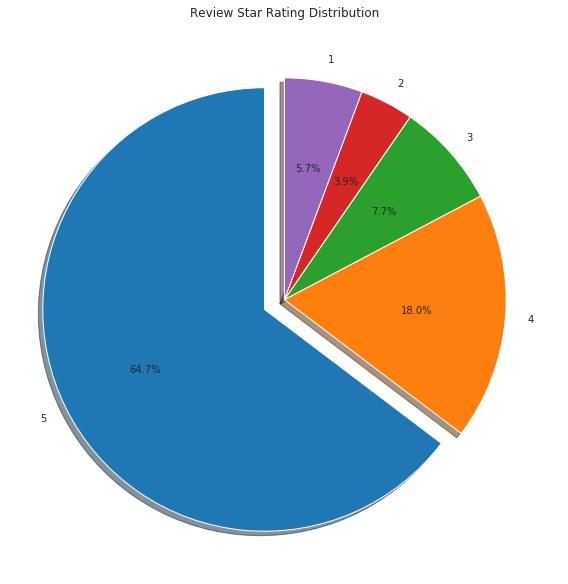

In [0]:
# Pie chart
agg = y_train.value_counts().sort_index(ascending=False)
labels = agg.index
sizes = agg.values
# only "explode" the largest slice
explode = (0.1, 0, 0, 0, 0)  
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.tight_layout()
plt.title('Review Star Rating Distribution')
plt.show()

In [0]:
uk = X_train.loc[X_train.marketplace == 'UK', 'product_category'].value_counts()
us = X_train.loc[X_train.marketplace == 'US', 'product_category'].value_counts()

print(uk)
print()
print(us)

Video DVD                   324259
Music                       230443
Digital_Ebook_Purchase      202311
Books                       180585
Mobile_Apps                 152827
Digital_Video_Download       21841
Digital_Music_Purchase       20501
Toys                         17212
PC                           11426
Camera                        4553
Electronics                   4079
Wireless                      3884
Video                         3263
Baby                          3008
Video Games                   2515
Watches                       2177
Musical Instruments           2015
Home                          1900
Sports                        1619
Shoes                         1178
Office Products                670
Home Improvement               664
Automotive                     373
Lawn and Garden                164
Health & Personal Care         163
Home Entertainment              87
Personal_Care_Appliances        61
Software                        50
Pet Products        

In [0]:
uk_length = (X_train.marketplace == 'UK').sum()
us_length = (X_train.marketplace == 'US').sum()

uk_percent = (uk / uk_length).sort_index()
us_percent = (us / us_length).sort_index()

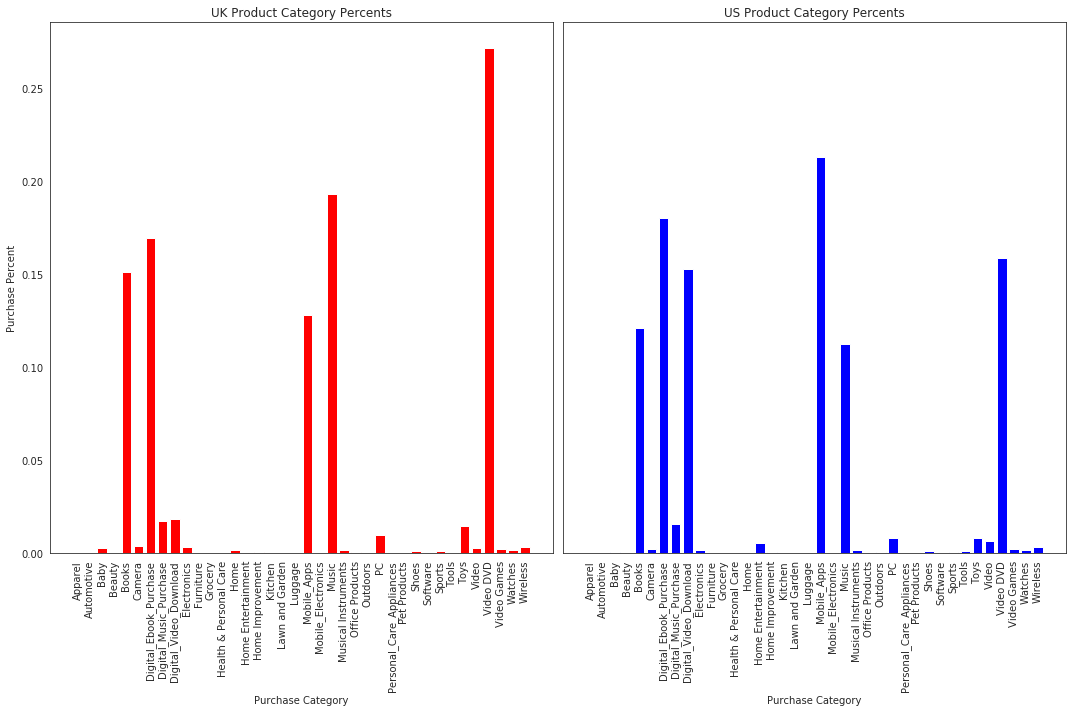

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

ax[0].bar(uk_percent.index, uk_percent.values, color='r')
ax[0].set_title('UK Product Category Percents')
ax[0].set_xticklabels(uk_percent.index, rotation='vertical')
ax[0].set_ylabel('Purchase Percent')
ax[0].set_xlabel('Purchase Category')

ax[1].bar(us_percent.index, us_percent.values, color='b')
ax[1].set_title('US Product Category Percents')
ax[1].set_xticklabels(us_percent.index, rotation='vertical')
ax[1].set_xlabel('Purchase Category')

plt.tight_layout()
plt.show();

In [0]:
pd.concat(
  [X_train, y_train], axis=1).groupby(
    'marketplace')['star_rating'].agg(['mean', 'std'], axis=1)

,mean,std
marketplace,,
UK,4.380,1.088
US,4.307,1.146


In [0]:
pd.concat(
  [X_train, y_train], axis=1).groupby(
    ['product_category','marketplace'])['star_rating'].agg(
      ['mean', 'std'], axis=1)

mean   std
product_category marketplace            
Apparel          UK          5.000 0.000
                 US          4.366 1.168
Automotive       UK          4.421 1.025
                 US          4.653 0.827
Baby             UK          4.552 0.950
...                            ...   ...
Video Games      US          4.178 1.320
Watches          UK          4.307 1.168
                 US          4.237 1.218
Wireless         UK          4.180 1.305
                 US          4.033 1.394

[76 rows x 2 columns]

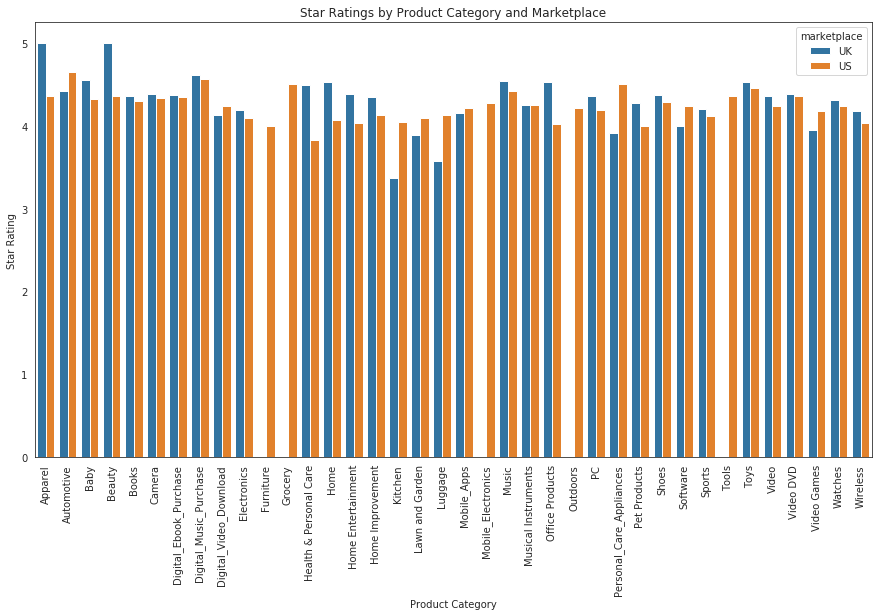

In [0]:
_ = pd.concat(
  [X_train, y_train], axis=1).groupby(
    ['product_category', 'marketplace'])['star_rating'].mean()
_ = _.reset_index() # convert from multi-index series to df.

plt.figure(figsize=(15, 8))
plt.title('Star Ratings by Product Category and Marketplace')
sns.barplot(x=_.product_category, y=_.star_rating, hue=_.marketplace,)
plt.xlabel('Product Category')
plt.ylabel('Star Rating')
plt.xticks(rotation='vertical');

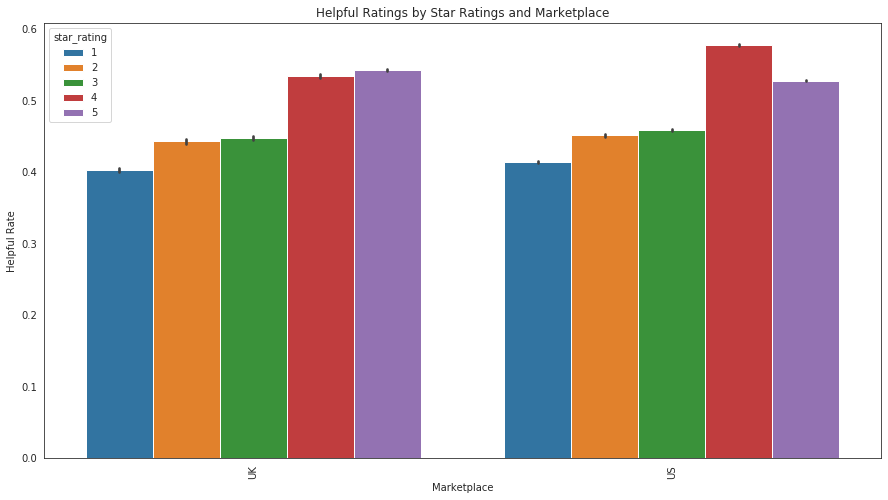

In [0]:
_ = pd.concat([X_train, y_train], axis=1)
_ = _[_.helpful_rate != -1]
_.groupby(['marketplace', 'star_rating'])['helpful_rate'].mean()
_ = _.reset_index()

plt.figure(figsize=(15, 8))
plt.title('Helpful Ratings by Star Ratings and Marketplace')
sns.barplot(x=_.marketplace, y=_.helpful_rate, hue=_.star_rating)
plt.xlabel('Marketplace')
plt.ylabel('Helpful Rate')
plt.xticks(rotation='vertical');

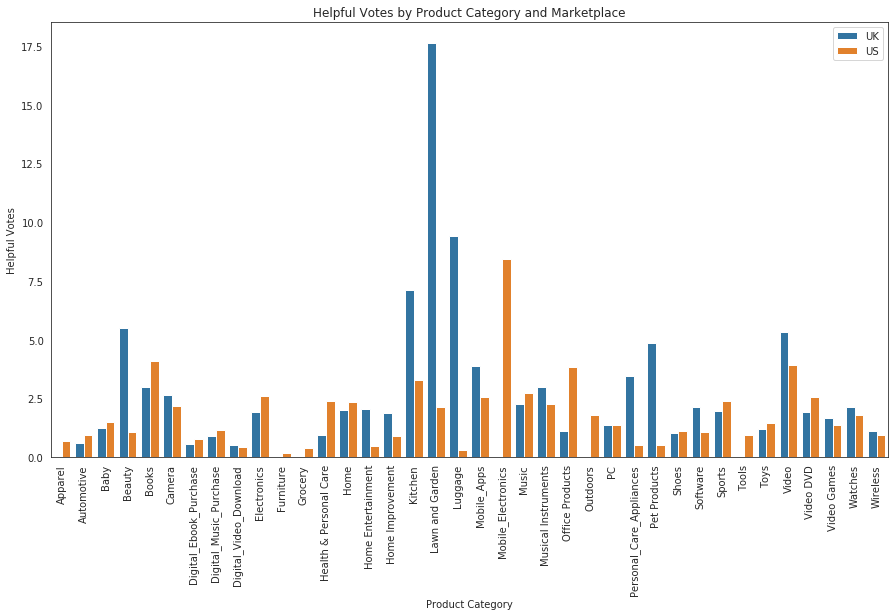

In [0]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation='vertical')
sns.barplot(x='product_category',
            y='helpful_votes',
            hue='marketplace',
            data=X_train, ci=None)
plt.legend(labels=['UK', 'US'])
plt.xlabel('Product Category')
plt.ylabel('Helpful Votes')
plt.title('Helpful Votes by Product Category and Marketplace');

Why is UK Lawn and Garden such an extreme outlier? After looking into the data, it appears that only 186 of the reviews were from British Lawn & Garden customers. Of those, approximately eleven were helpful reviews, which yields such an extremely higher percentage. With more reviews in that category, there is great likelihood that the helpful vote percentage would even out.

In [0]:
X_train_L_and_G_count = X_train[(X_train.product_category == 'Lawn and Garden') &
                                (X_train.marketplace == 'UK')].shape[0]

X_train_L_and_G_positive_review_count = X_train[
  (X_train.product_category == 'Lawn and Garden') &
  (X_train.marketplace == 'UK') &
  (X_train.helpful_votes == 1)].shape[0]

print('Number of Lawn and Garden Reviews from the UK:', X_train_L_and_G_count)
print('Helpful Reviews for UK Lawn & Garden:',
    X_train_L_and_G_positive_review_count)
print('Percent Helpful Review:', round(
    (X_train_L_and_G_positive_review_count * 100 / X_train_L_and_G_count), 3))

Number of Lawn and Garden Reviews from the UK: 164
Helpful Reviews for UK Lawn & Garden: 29
Percent Helpful Review: 17.683


In [0]:
X_train.groupby(['product_category', 'marketplace'])['helpful_votes'].agg(
    ['mean', 'std'])

mean    std
product_category marketplace             
Apparel          UK          0.000  0.000
                 US          0.710  1.880
Automotive       UK          0.617  2.123
                 US          0.953  3.370
Baby             UK          1.242 20.575
...                            ...    ...
Video Games      US          1.375 14.225
Watches          UK          2.153  6.563
                 US          1.792 10.839
Wireless         UK          1.109  6.279
                 US          0.926  9.038

[76 rows x 2 columns]

In [0]:
# Group by Verified users only.
X_train.groupby(
    ['verified_purchase', 'marketplace'])['helpful_rate'].agg(['mean', 'std'])

mean   std
verified_purchase marketplace             
N                 UK           0.134 0.770
                  US          -0.010 0.810
Y                 UK          -0.486 0.744
                  US          -0.462 0.756

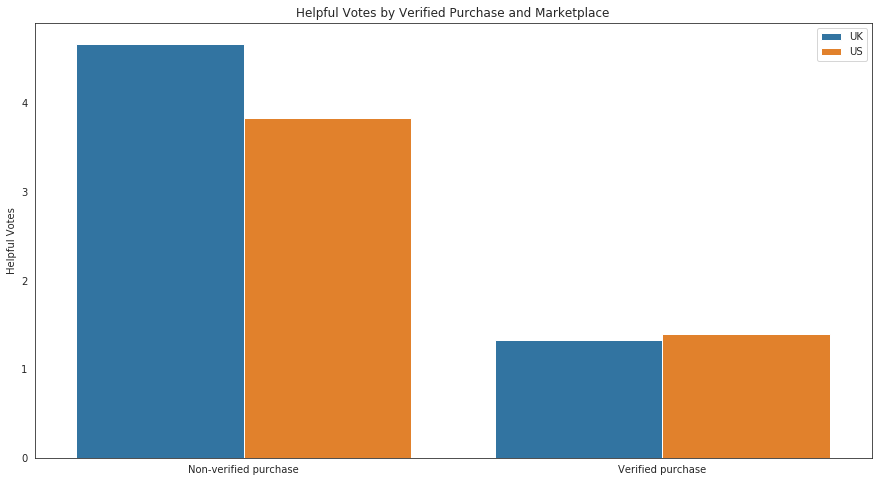

In [0]:
plt.figure(figsize=(15, 8))
sns.barplot(x='verified_purchase',
            y='helpful_votes',
            hue='marketplace',
            data=X_train, ci=None)
plt.legend(['UK', 'US'])
plt.xticks(labels=['Non-verified purchase', 'Verified purchase'], ticks=[0, 1])
plt.title('Helpful Votes by Verified Purchase and Marketplace')
plt.xlabel('')
plt.ylabel('Helpful Votes');

In [0]:
# Group by Vine users only.
X_train.groupby(
    ['vine', 'marketplace'])['helpful_rate'].agg(['mean', 'std'])

mean   std
vine marketplace             
N    UK          -0.340 0.795
     US          -0.340 0.797
Y    UK           0.137 0.781
     US           0.153 0.796

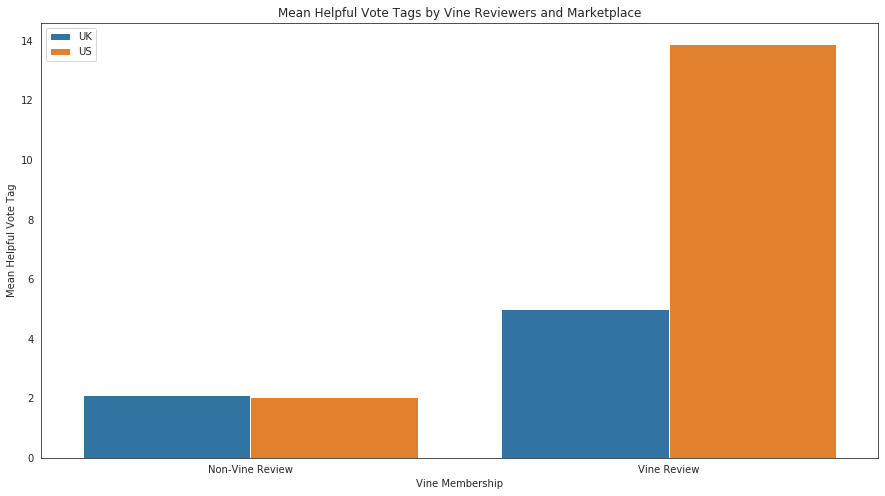

In [0]:
plt.figure(figsize=(15, 8))
sns.barplot(x='vine',
            y='helpful_votes',
            hue='marketplace',
            data=X_train, ci=None)
plt.legend(['UK', 'US'])
plt.xticks(ticks=[0, 1], labels=['Non-Vine Review', 'Vine Review'])
plt.title('Mean Helpful Vote Tags by Vine Reviewers and Marketplace')
plt.xlabel('Vine Membership')
plt.ylabel('Mean Helpful Vote Tag');

In [0]:
# Distribution of vine transactions.
X_train.vine.value_counts()

N    6016198
Y       8126
Name: vine, dtype: int64

In [0]:
_ = pd.concat([X_train, y_train], axis=1)
_.head()

l_and_g = _[_['product_category'] == 'Lawn and Garden']
l_and_g.groupby('marketplace')['helpful_votes'].value_counts().sort_index()

marketplace  helpful_votes
UK           0                48
             1                29
             2                18
             3                13
             4                 5
                              ..
US           47                1
             54                1
             82                1
             302               1
             430               1
Name: helpful_votes, Length: 69, dtype: int64

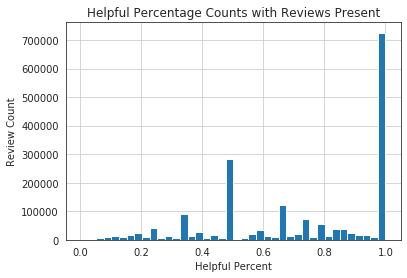

In [0]:
X_train[X_train['helpful_rate'] > 0]['helpful_rate'].hist(bins=40)
plt.xlabel('Helpful Percent')
plt.ylabel('Review Count')
plt.title('Helpful Percentage Counts with Reviews Present');

Upsample/downsample next? Use all UK data and upsample to US data, or upsample some and downsample some? If the latter, should the new data be jittered (upsampling only)?

In [0]:
X_train.describe()

,index,helpful_votes,total_votes,helpful_rate
count,6024324.000,6024324.000,6024324.000,6024324.000
mean,2936058.346,2.069,3.270,-0.339
std,2074282.432,30.429,34.583,0.796
min,0.000,0.000,0.000,-1.000
25%,1075921.750,0.000,0.000,-1.000
50%,2598384.000,0.000,0.000,-1.000
75%,4749766.250,1.000,2.000,0.500
max,6900885.000,27550.000,28727.000,1.000


In [0]:
X_train.helpful_votes.mean()

2.0686141714821447

In [0]:
X_train.loc[X_train.helpful_votes > 0, 'helpful_votes'].std()

54.56923323170825

In [0]:
X_train.describe()

,index,helpful_votes,total_votes,helpful_rate
count,6024324.000,6024324.000,6024324.000,6024324.000
mean,2936058.346,2.069,3.270,-0.339
std,2074282.432,30.429,34.583,0.796
min,0.000,0.000,0.000,-1.000
25%,1075921.750,0.000,0.000,-1.000
50%,2598384.000,0.000,0.000,-1.000
75%,4749766.250,1.000,2.000,0.500
max,6900885.000,27550.000,28727.000,1.000


In [0]:
def shrink_outliers(feature: str, train_df: pd.DataFrame, eval_df: pd.DataFrame,
                    holdout_df: pd.DataFrame):  
  """
  Takes a feature and replaces values which are greater than three standard
  deviations from the mean with the value at that point. 
  
  Args:
    feature: the column with outliers
    train_df: DataFrame from which mean and standard deviation will be 
      calculated.
    eval_df: DataFrame will have mean and standard deviation applied to feature
      column.
    holdout_df: DataFrame will have mean and standard deviation applied to
      feature column.
  Returns:
    train_df: DataFrame with outliers replaced.
    eval_df: DataFrame with outliers replaced.
    holdout_df: DataFrame with outliers replaced.
  """

  mean = train_df.loc[train_df[feature] != 0, feature].mean()
  std = train_df.loc[train_df[feature] != 0, feature].std()
  replacement_value = mean + (3 * std)

  train_df[feature] = train_df[feature].apply(
      lambda x: x if x < replacement_value else replacement_value).copy()
  eval_df[feature] = eval_df[feature].apply(
      lambda x: x if x < replacement_value else replacement_value).copy()
  holdout_df[feature] = holdout_df[feature].apply(
      lambda x: x if x < replacement_value else replacement_value).copy() 
  
  return train_df, eval_df, holdout_df

In [0]:
X_train = X_train.copy()
X_eval = X_eval.copy()
X_holdout = X_holdout.copy()

In [0]:
# Add column with length of review_body.
X_eval['review_body_len'] = X_eval.review_body.str.split().apply(len)

In [0]:
X_holdout['review_body_len'] = X_holdout.review_body.str.split().apply(len)

In [0]:
# Ran into memory issues using vectorized methods. Switched to for loop to 
# calculate lengths.
lengths = []
for i, text in X_train.review_body.iteritems():
  lengths.append(len(text.split()))

assert X_train.shape[0] == len(lengths)
X_train['review_body_len'] = lengths

In [0]:
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)

In [0]:
X_train.loc[:, ['review_body', 'review_body_len']].head()

,review_body,review_body_len
2712123,"My review will be simple and to the point, not...",265
3194261,This is a brillant report on a veteran who had...,56
4586123,Have made this my lifestyle. Its very effecti...,24
5188418,sorry I missed this. If I had children at hom...,27
4582358,I really love the product and a it is a very g...,20


In [0]:
X_train.describe()

,index,helpful_votes,total_votes,helpful_rate,review_body_len
count,6024324.000,6024324.000,6024324.000,6024324.000,6024324.000
mean,2936058.346,2.069,3.270,-0.339,68.665
std,2074282.432,30.429,34.583,0.796,136.525
min,0.000,0.000,0.000,-1.000,1.000
25%,1075921.750,0.000,0.000,-1.000,20.000
50%,2598384.000,0.000,0.000,-1.000,28.000
75%,4749766.250,1.000,2.000,0.500,64.000
max,6900885.000,27550.000,28727.000,1.000,8927.000


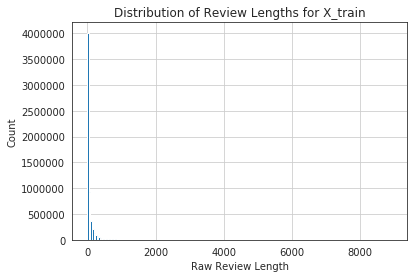

In [0]:
X_train.review_body_len.hist(bins=200)
plt.xlabel('Raw Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths for X_train');

In [0]:
X_train, X_eval, X_holdout = shrink_outliers(
    'review_body_len', X_train, X_eval, X_holdout)

In [0]:
X_train.describe()

,index,helpful_votes,total_votes,helpful_rate,review_body_len
count,6024324.000,6024324.000,6024324.000,6024324.000,6024324.000
mean,2936058.346,2.069,3.270,-0.339,62.540
std,2074282.432,30.429,34.583,0.796,91.516
min,0.000,0.000,0.000,-1.000,1.000
25%,1075921.750,0.000,0.000,-1.000,20.000
50%,2598384.000,0.000,0.000,-1.000,28.000
75%,4749766.250,1.000,2.000,0.500,64.000
max,6900885.000,27550.000,28727.000,1.000,478.240


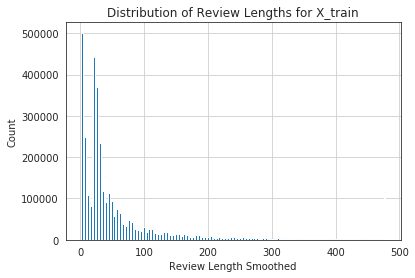

In [0]:
X_train.review_body_len.hist(bins=200)
plt.xlabel('Review Length Smoothed')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths for X_train');

In [0]:
# Text cleaning.
def _strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


def _remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


def denoise_text(text):
    #text = _strip_html(text)
    text = _remove_between_square_brackets(text)
    return text

In [0]:
X_train['review_body'] = X_train.review_body.apply(denoise_text)

In [0]:
X_eval['review_body'] = X_eval.review_body.apply(denoise_text)

In [0]:
X_holdout['review_body'] = X_holdout.review_body.apply(denoise_text)

In [0]:
os.getcwd()

'/content/drive/My Drive/Colab Datasets'

In [0]:
vect = CountVectorizer(encoding='utf-8', lowercase=True, stop_words='english',
                       ngram_range=(1,1), min_df=10, max_features=5_000,
                       dtype=np.int32)

In [0]:
X_train_text_vect = vect.fit_transform(X_train.review_body)

In [0]:
X_eval_text_vect = vect.transform(X_eval.review_body)

In [0]:
X_holdout_text_vect = vect.transform(X_holdout.review_body)

In [0]:
type(X_eval_text_vect)

scipy.sparse.csr.csr_matrix

In [0]:
scipy.sparse.save_npz('X_train_text_sparse', X_train_text_vect)

In [0]:
scipy.sparse.save_npz('X_eval_text_sparse', X_eval_text_vect)

In [0]:
scipy.sparse.save_npz('X_holdout_text_sparse', X_holdout_text_vect)

In [0]:
X_train['target'] = y_train
X_eval['target'] = y_eval
X_holdout['target'] = y_holdout

In [0]:
X_train.to_csv('train_clean.tsv', index=False, sep='\t')

In [0]:
X_eval.to_csv('eval_clean.tsv', index=False, sep='\t')

In [0]:
X_holdout.to_csv('holdout_clean.tsv', index=False, sep='\t')

In [0]:
text_col_names = vect.get_feature_names()

In [0]:
len(text_col_names)

5000

In [0]:
with open('text_col_names.csv', 'a') as f:
  for col in text_col_names:
    f.write('{}, '.format(col))

In [0]:
ls -lah

total 8.0G
-rw------- 1 root root 821M Sep 27 17:40 amazon_reviews_UK.tsv
-rw------- 1 root root 3.4G Sep 27 17:40 amazon_reviews_US.tsv
-rw------- 1 root root 529M Nov 16 01:45 eval_clean.tsv
-rw------- 1 root root 531M Nov 16 01:46 holdout_clean.tsv
-rw------- 1 root root 127K Nov 16 01:48 text_col_names.csv
-rw------- 1 root root 2.5G Nov 16 01:45 train_clean.tsv
-rw------- 1 root root  54M Nov 16 01:42 X_eval_text_sparse.npz
-rw------- 1 root root  54M Nov 16 01:43 X_holdout_text_sparse.npz
-rw------- 1 root root 259M Nov 16 01:42 X_train_text_sparse.npz
